# Lab 4.01 - Bivariate Analysis of Qualitative Data


In [34]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 1 - soft-drinks


The file softdrinks.xlsx categorizes 250 randomly 
selected consumers on the basis of their gender, their 
age, and their preference for our brand or a competitor's brand of a low-calorie soft drink. Use a chi-square test for independence to see whether the drink 
preference is independent of gender, and then whether 
it is independent of age.  First make a plot



Results of the main calculations:
- age vs preference
  - χ² ≈ 3.8589  
  - p-value = 0.2771
  - We do not reject H0


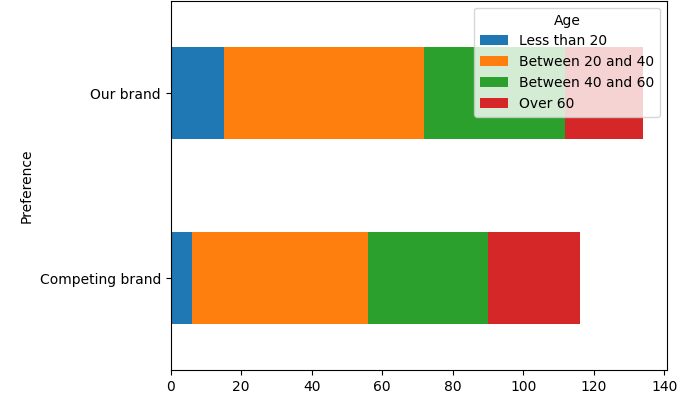



- gender vs preference
  - χ² ≈ 1.4078 
  - p-value = 0.2354
  - We do not reject H0

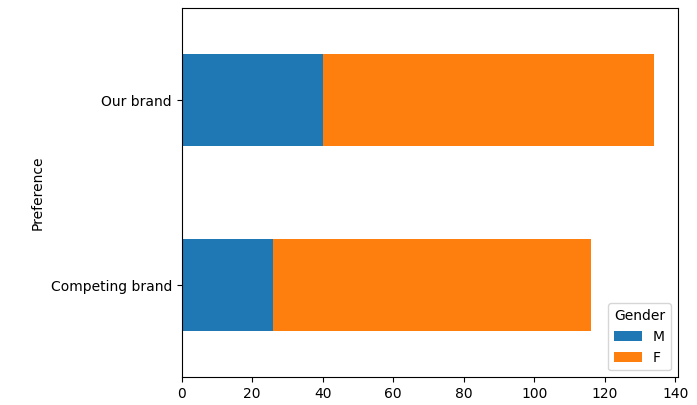

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Softdrinks.csv', sep=";")
df.head()

,Consumer,Gender,Age,Preference
0,1,F,Over 60,Our brand
1,2,F,Between 40 and 60,Our brand
2,3,M,Between 40 and 60,Our brand
3,4,F,Over 60,Competing brand
4,5,M,Between 20 and 40,Our brand


### Age vs Brand

In [36]:


df['Age'] = df['Age'].astype(CategoricalDtype(categories=df['Age'].unique(), ordered=True))

observed = pd.crosstab(df['Age'], df['Preference'])

row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()

expected = np.outer(row_sums, col_sums) / n
print(expected)
print(observed)

alpha = .01
dimensions = observed.shape

#dof = (dimensions[0]-1) * (dimensions[1]-1)

diffs = (expected - observed)**2 / expected
chi_squared = diffs.values.sum()

observed = pd.crosstab(df['Age'], df['Preference'])
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("P-value           : %.4f" % p)

print('χ² ≈ %.3f' %chi_squared)

print("Chi-squared        : %.4f" % chi_squared)
print("Degrees of freedom : %d" % dof)

# Calculate critical value
g = stats.chi2.isf(alpha, df = dof)
print("Critical value     : %.4f" % g)

# Calculate p-value
p = stats.chi2.sf(chi_squared, df=dof)
print("p-value            : %.4f" % p)


[[22.272 25.728]
 [34.336 39.664]
 [49.648 57.352]
 [ 9.744 11.256]]
Preference         Competing brand  Our brand
Age                                          
Over 60                         26         22
Between 40 and 60               34         40
Between 20 and 40               50         57
Less than 20                     6         15
Chi-squared       : 3.8589
P-value           : 0.2771
χ² ≈ 3.859
Chi-squared        : 3.8589
Degrees of freedom : 3
Critical value     : 11.3449
p-value            : 0.2771


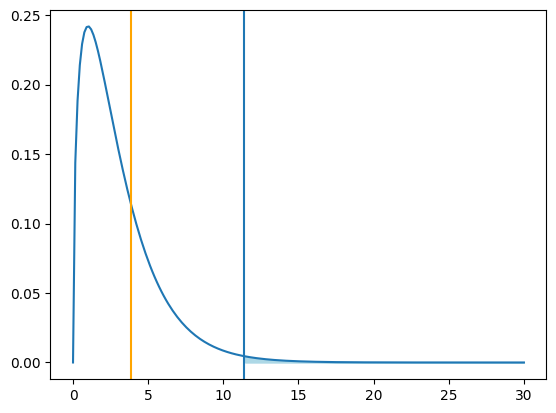

In [37]:
# x-values:
x = np.linspace(0, 30, num=200)
# probability density of the chi-squared distribution
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 1%:
 

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=g, # critical area
    color='lightblue')
tplot.axvline(g)                     # critical value
tplot.axvline(chi_squared, color='orange')  # chi-squared

In [38]:
observed = pd.crosstab(df['Age'], df['Preference'])
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

Chi-squared       : 3.8589
Degrees of freedom: 3
P-value           : 0.2771


### Gender vs Brand

In [39]:
# Chi-squared test for independence based on a contingency table
observed = pd.crosstab(df['Gender'], df['Preference'])
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

Chi-squared       : 1.4078
Degrees of freedom: 1
P-value           : 0.2354


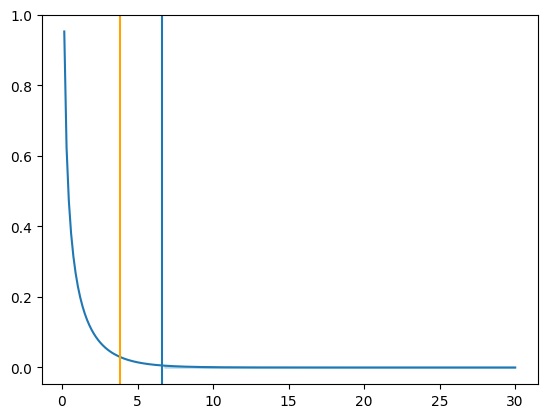

In [40]:
# x-values:
x = np.linspace(0, 30, num=200)
# probability density of the chi-squared distribution
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 1%:

g = stats.chi2.isf(alpha, df = dof)


fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=g, # critical area
    color='lightblue')
tplot.axvline(g)                     # critical value
tplot.axvline(chi_squared, color='orange')  # chi-squared